# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [ ]:
# importar librerías
import pandas as pd #Importamos pandas nuestra libreria principal para trabajar.
import matplotlib.pyplot as plt #Importamos matplotlib para los graficos.


In [ ]:
# leer conjuntos de datos en los DataFrames
orders_df = pd.read_csv('/content/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/content/products.csv', sep=';')
aisles_df = pd.read_csv('/content/aisles.csv', sep=';')
departments_df = pd.read_csv('/content/departments.csv', sep=';')
order_products_df = pd.read_csv('/content/order_products.csv', sep=';')

In [ ]:
# Mostramos la informacion del DataFrame orders.

display(orders_df.head())
print(orders_df.info())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [ ]:
# mostrar información del DataFrame products
display(products_df.head())
print(products_df.info())

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
# mostramos la información del DataFrame order prodducts/

display(order_products_df.head())
print(order_products_df.info())

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [ ]:
# mostrar información del DataFrame

display(aisles_df.head())
print(aisles_df.info())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [ ]:
# Mostramos la informacion del DataFrame departments.

display(departments_df.head())
print(departments_df.info())


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


## Conclusiones

En este primer paso, hemos cargado cinco conjuntos de datos en 5 DataFrames de pandas: orders_df, products_df, aisles_df, departments_df, y order_products_df.
Se ha tenido que definir/indicar el separador ';' para leer los archivos CSV, porque en una primera impresion se vio que ese era el utilizado en vez de la coma.
Después de cargar los datos, hemos procedido a mostrar las primeras 10 filas (y en un caso las 21) de cada DataFrame y su información general .

Mostrar las primeras filas nos ha permitido obtener una vista rápida de la estructura de cada DataFrame, incluyendo los nombres de las columnas y el tipo de datos "aparente" de las primeras entradas. Esto es sirve para confirmar que la carga de datos fue exitosa y que el separador (;) fue interpretado correctamente, ya que las columnas ahora estan bien definidas.

La información general para cada DataFrame nos ha proporcionado detalles importantes como:
El número de filas y columnas.
Los nombres de las columnas.
El número de valores no nulos en cada columna, lo que nos permite identificar columnas con valores ausentes de manera preliminar.
Los tipos de datos para cada columna. Esto es importante para el preprocesamiento, porque debemos asegurarnos de que los tipos de datos sean apropiados para el análisis que sigue.

En resumen, el Paso 1 nos ha permitido inspeccionar inicialmente los conjuntos de datos, confirmar su carga exitosa, entender su estructura básica, identificar los tipos de datos iniciales y detectar la presencia de valores ausentes en algunas columnas, lo cual será el siguiente paso de preprocesamiento.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

El objetivo de este paso es limpiar y preparar los datos para el análisis, abordando problemas comunes como tipos de datos incorrectos, valores ausentes y registros duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [ ]:
#Revisamos si hay pedidos duplicados
print('El total de duplicados es :', orders_df.duplicated().sum()) #Revisamos si hay duplicados y encontramos que en efecto los hay.

#Como son pocos, Queremos visualizar solo los duplicados y ver que tienen en comun.
duplicate_orders = orders_df[orders_df.duplicated(keep='first')]

#La idea es mostrarlos agrupados para que sea mas facil identificar si son identicos.
#Obtener la lista de nombres de todas las columnas
columnas_orders = orders_df.columns.tolist()

#Ordenamos las filas duplicadas por todas las columnas
duplicate_orders_sorted = duplicate_orders.sort_values(by=columnas_orders)

#Mostrar el DataFrame ordenado
display(duplicate_orders_sorted)

El total de duplicados es : 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
273805,1112182,202304,84,3,2,6.0
411408,1286742,183220,48,3,2,4.0
266232,1782114,106752,1,3,2,NaN
230807,1918001,188546,14,3,2,16.0
323900,1919531,191501,32,3,2,7.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si hay 15 duplicadas que son exactamente iguales a la original. Tienen en comun el dia miercoles a las 2 am.

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
# Definir el día y la hora objetivo
dia_miercoles = 3
hora_2am = 2

# Filtrar el DataFrame orders_df
pedidos_miercoles_2am = orders_df[(orders_df['order_dow'] == dia_miercoles) & (orders_df['order_hour_of_day'] == hora_2am)]

# Mostrar los pedidos filtrados
display(pedidos_miercoles_2am)

# Opcional: Ver cuántos pedidos cumplen este criterio
print(f"Número de pedidos el miércoles a las 2:00 a.m.: {pedidos_miercoles_2am.shape[0]}")
#Use .shape[] para contar las filas del resultado; que equivaldria a las cantidad de transacciones.

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Número de pedidos el miércoles a las 2:00 a.m.: 121


¿Qué sugiere este resultado?

In [ ]:
# Elimina los pedidos duplicados
orders_df = orders_df.drop_duplicates()

In [ ]:
# Vuelve a verificar si hay filas duplicadas
print('El total de duplicados ahora es :', orders_df.duplicated().sum())

El total de duplicados ahora es : 0


In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
id_duplicados = orders_df['order_id'].duplicated().sum()
print('El total de duplicados segun order ID es:', id_duplicados)

El total de duplicados segun order ID es: 0


Encontramos que inicialmente habian 15 dupicados exactos que se dieron el mismo dia y a la misma hora segun otra filtracion realizada al encontrar ese detalle coincidente entre ellos en la primera. Esto puede sugerir un problema o falla en el sistema en ese momento que pudo generar esos duplicados. Los eliminamos dejando solo la primera aparicion.
luego verificaamos si existia alguna orden duplicada segun el ID individual de cada orden que debe ser unico y vimos que no hay, asi que podemos proceder.

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
productos_duplicados = products_df.duplicated().sum()
print('El total de productos duplicados en productos es :', productos_duplicados)

El total de productos duplicados en productos es : 0


In [ ]:
# Revisa únicamente si hay ID de productos duplicados
productos_duplicados_id = products_df['product_id'].duplicated().sum()
print('El total de productos duplicados segun ID en productos es :', productos_duplicados_id)

El total de productos duplicados segun ID en productos es : 0


In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
productos_duplicados_nombre = products_df['product_name'].str.upper().duplicated().sum()
print('El total de productos duplicados segun nombre en productos es :', productos_duplicados_nombre)

El total de productos duplicados segun nombre en productos es : 1361


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
productos_sin_nombre_faltante = products_df.dropna(subset=['product_name'])

# Ahora, revisamos si hay nombres duplicados en este subconjunto (ignorando mayúsculas/minúsculas)
nombres_no_faltantes_mayusculas = productos_sin_nombre_faltante['product_name'].str.upper().duplicated().sum()


print('El número de nombres de productos duplicados (solo entre no faltantes):', nombres_no_faltantes_mayusculas)


El número de nombres de productos duplicados (solo entre no faltantes): 104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Pudimos ver que no existen filas completamente duplicadas; no hay ids de productos duplicados tampoco, esto es importante porque nos permitiria comparar o unir esta tabla con otra de ser necesario. Sin embargo al filtrar por el nombre de los productos encontramos que hay 104 duplicados quizas por un a variacion en la nomenclatura o en la forma de escribirse.
Hasta ahora el principal problema de calidad de datos identificado en esta tabla hasta es la inconsistencia en los nombres de los productos, por esos 104 nombres que se repiten a pesar de estar con diferentes IDs de producto.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
duplicados_departments = departments_df.duplicated().sum()
print('El total de duplicados en departments es :', duplicados_departments)

El total de duplicados en departments es : 0


In [ ]:
# Revisa únicamente si hay IDs duplicadas de departamentos
duplicados_departments_id = departments_df['department_id'].duplicated().sum()
print('El total de duplicados segun id de departmentamento es :', duplicados_departments_id)

El total de duplicados segun id de departmentamento es : 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

EL hecho de que no hay filas totalmente duplicadas ni duplicados de ID en departments_df sugieren que esta tabla está bien estructurada y limpia en lo que tiene que ver con la identificación de sus registros. Podriamos confiar en ella para obtener información precisa sobre los departamentos.

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
duplicados_aisles = aisles_df.duplicated().sum()
print('El total de duplicados en aisles es :', duplicados_aisles)

El total de duplicados en aisles es : 0


In [ ]:
# Revisa únicamente si hay IDs duplicadas de pasillos
duplicados_aisles_id = aisles_df['aisle_id'].duplicated().sum()
print('El total de duplicados segun id de aisle es :', duplicados_aisles_id)

El total de duplicados segun id de aisle es : 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al igual que en la tabla de departments_df; aisles_df tampoco tiene duplicados identicos en sus filas ni en su clave primaria que es el id de asisle. Tambien podriamos confiar en su calidad para analisis posterios o relacion con otras tablas .

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas

duplicados_order_products = order_products_df.duplicated().sum()
print('El total de duplicados en order_products es :', duplicados_order_products)

El total de duplicados en order_products es : 0


In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

#En teoria un pedido especifico no deberia contener el mismo producto más de una vez
#La forma más comun de verificar "duplicados engañosos" en esta tabla seria buscar combinaciones duplicadas de order_id y product_id. Utilizaremos el método duplicated() pero especificando un las columnas.
duplicados_enganosos = order_products_df.duplicated(subset=['order_id', 'product_id']).sum()
print('Numero de combinaciones duplicadas (order_id, product_id) en order_products_df: ',duplicados_enganosos)

Numero de combinaciones duplicadas (order_id, product_id) en order_products_df:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

 Los hallazgos indican que no hay filas totalmente duplicadas y no hay duplicados engañosos (order_id, product_id) Esto sugiere tambien que la tabla order_products_df está bien estructurada y parece libre de problemas de duplicación. Nos da confianza para utilizar esta tabla para analizar el contenido de los pedidos, la popularidad de los productos, o patrones de reordenamiento.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'

productos_ausentes = products_df['product_name'].isnull().sum()
print('Los valores ausentes en la columna product_name son: ', productos_ausentes)


Los valores ausentes en la columna product_name son:  1258


Describe brevemente cuáles son tus hallazgos.

El resultado de la busqueda de ausentes indica que hay 1258 ausentes. Esto es importante porque se trata del nombre de un producto, que es esencial para identificar y analizar los productos.

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

productos_ausentes = products_df[products_df['product_name'].isnull()] #Buscamos primero los productos ausentes
pasillo_100 = (productos_ausentes['aisle_id'] == 100).all() #Luego hacemos la comparacion de la columna aisle_id con 100, si estan todos el resultado sera True si no, False
print('La relacion entre los nombres ausentes y el pasillo ID 100 es: ', pasillo_100)

La relacion entre los nombres ausentes y el pasillo ID 100 es:  True


Describe brevemente cuáles son tus hallazgos.

Para determinar si los nombres de productos ausentes están relacionados con el pasillo con ID 100, primero filtramos el DataFrame products_df para incluir solo las filas donde 'product_name' es nulo o ausente y luego verificamos si el 'aisle_id' en esas filas es igual a 100.
Podemos ver que en efecto, estan relacionados con el pasillo 100.

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
departamento_21 = (productos_ausentes['department_id'] == 21).all()
print('La relacion entre los nombres ausentes y el departamento ID 21 es: ', departamento_21)

La relacion entre los nombres ausentes y el departamento ID 21 es:  True


Describe brevemente cuáles son tus hallazgos.

Podriamos decir que la relación con el departamento ID 21 no es una nueva causa independiente, sino que es una consecuencia de la relación con el pasillo ID 100, asumiendo una estructura jerárquica de pasillos dentro de departamentos. Segun lo investigado se Confirma que el problema está contenido en una sección muy específica de la asignacion o clasificacion de los productos y su identificacion ahi.

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100_info = aisles_df[aisles_df['aisle_id'] == 100]
print("Información del Pasillo con ID 100:")
display(aisle_100_info)

print() # Separador

# Usa la tabla departments_df para encontrar el nombre del departamento con ID 21
department_21_info = departments_df[departments_df['department_id'] == 21]
print("Información del Departamento con ID 21:")
display(department_21_info)

Información del Pasillo con ID 100:


,aisle_id,aisle
99,100,missing



Información del Departamento con ID 21:


,department_id,department
20,21,missing


Describe brevemente cuáles son tus hallazgos.

El hecho de que tanto el pasillo 100 como el departamento 21 se llamen "missing" puede confirmar que los productos asociados a estos IDs pertenecen a una categoría designada para información faltante o desconocida, quizas por quien ccomplilo la informacion al principio; podriamos entonces marcarlos con un nombre como "unknown".

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown') #Re-asignamos el nombre a Unknown
#Comprobamos si hay ausentes
print('Los valores ausentes en la columna product_name después de completar son: ', products_df['product_name'].isnull().sum())

Los valores ausentes en la columna product_name después de completar son:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hasta aqui hemos limpiado los datos de duplicados exactos en la tabla de pedidos y hemos abordado la ausencia de nombres de productos completándolos con un valor representativo. Los otros dos DataFrames de referencia y la tabla de pedidos parecen estar limpios en términos de duplicados.

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes

print('Los valores ausentes en Orders son:\n', orders_df.isnull().sum())

Los valores ausentes en Orders son:
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

#La instruccion se siente un poco vaga o incompleta pero vamos a ver...
#Para eso vamos a verificar si hay valores ausentes "que no son el primer pedido de un cliente"
#Usando las columnas days_since_prior_order y order_number.

ausentes_days_prior_order = orders_df[orders_df['days_since_prior_order'].isnull()] #Creamos un DataFrame con los valores ausentes.
ausentes_noson_primer_pedido = (ausentes_days_prior_order['order_number'] > 1).any() # Comparamos si alguno de esos nulos es >1 para poder determinar que no es el primer pedido.

#respuesta:
print('Hay valores ausentes que no son el primer pedido de un cliente: ', ausentes_noson_primer_pedido)

Hay valores ausentes que no son el primer pedido de un cliente:  False


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Entiendo que los valores ausentes que estaban en days_since_prior-Order corresponden solamente a los primeros pedidos de cada cliente; asi que no son un problema. Podriamos dejarlos como estan ya que es logica su ausencia y no interfieren de momento con el analisis.

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes

print('Los valores ausentes en order products son: \n', order_products_df.isnull().sum())

Los valores ausentes en order products son: 
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

minimo_add_to_cart = order_products_df['add_to_cart_order'].min()
maximo_add_to_cart = order_products_df['add_to_cart_order'].max()
print('El valor minimo de add_to_cart_order es: ', minimo_add_to_cart)
print('El valor maximo de add_to_cart_order es: ', maximo_add_to_cart)

El valor minimo de add_to_cart_order es:  1.0
El valor maximo de add_to_cart_order es:  64.0


Describe brevemente cuáles son tus hallazgos.

Se encontraron 100 valores ausentes en la columna de registro de agregar al carrito; pero en perspectiva con las mas de 500 mil filas del DataFrame es minimo. Al ver los valores min y max se ve razonable la cantidad de articulos por lo que la informacion es confiable y esta bastante bien su calidad.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

#Primero sacamos las filas con valores ausentes.
pedidos_ausentes_add_to_cart = order_products_df[order_products_df['add_to_cart_order'].isnull()]
#Ahora "sacamos" la columna order_id de estos.
id_pedidos_ausentes_add_to_cart = pedidos_ausentes_add_to_cart['order_id'] #Mostramos para ver que se guardo
print('Las primeras 10 filas de esta seleccion serian: \n', id_pedidos_ausentes_add_to_cart.head(10))


Las primeras 10 filas de esta seleccion serian: 
 737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
34183     844733
57981      61355
58228     936852
62655     264710
64336    1717990
Name: order_id, dtype: int64


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

#Punto 1 (Similar a lo anterior)
ausentes_add_to_cart_grouped = order_products_df[order_products_df['add_to_cart_order'].isnull()]['order_id'].unique()
#Punto 2 Agrupar todos los ausentes por ID
items_en_pedidos_con_ausentes = order_products_df[order_products_df['order_id'].isin(ausentes_add_to_cart_grouped)]
#Punto 3 Conteo y revisar el minimo
conteo_productos_por_pedido_afectado = items_en_pedidos_con_ausentes.groupby('order_id')['product_id'].count()
minimo_productos_por_pedido = conteo_productos_por_pedido_afectado.min()
print('El valor minimo de productos por pedido es: ', minimo_productos_por_pedido)
#Ahora vamos a verificar de estos valores cual es mayor a 64 para el punto principal
mas_de_64_productos = (minimo_productos_por_pedido > 64)
print('Hay pedidos con mas de 64 productos: ', mas_de_64_productos)


El valor minimo de productos por pedido es:  65
Hay pedidos con mas de 64 productos:  True


Describe brevemente cuáles son tus hallazgos.

Esto puede sugerir que el problema de los valores ausentes en add_to_cart_order está en pedidos grandes, con un mínimo de 65 artículos. Aunque el mínimo es 65, podrían haber pedidos afectados con un número mayor de productos. La ausencia de datos en add_to_cart_order para estos artículos específicos dentro de pedidos grandes podría indicar un problema en el registro del orden en que se añadieron esos productos al carrito, quizas esoecialmente en compras grandes o varios productos.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999) #Remplazamos los valores ausentes con 999
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int) #Convertimos la columna a entero

#Verificamos ambas cosas
print('Los valores ausentes en la columna add_to_cart_order son: ', order_products_df['add_to_cart_order'].isnull().sum())
print('La columna add_to_cart_order es de tipo: ', order_products_df['add_to_cart_order'].dtype )



Los valores ausentes en la columna add_to_cart_order son:  0
La columna add_to_cart_order es de tipo:  int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En resumen, identificamos un problema de valores ausentes en una columna específica, exploramos su contexto y luego manejamos esos valores ausentes reemplazándolos por un valor específico (999) y nos aseguramos que la columna tuviera el tipo de dato apropiado para continuar el análisis.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

El preprocesamiento de datos ha sido util para identificar y manejar los principales problemas de calidad de datos, en este caso: duplicados y valores ausentes.
Hemos limpiado las filas duplicadas exactas en la tabla de pedidos, abordado los nombres de productos ausentes y justificado la presencia de ausentes en la tabla de pedidos y en la tabla de productos de pedido.
Las tablas de referencia aisles_df, departments_df y la tabla order_products_df mostraron una buena calidad en cuanto a duplicados.

Con estos pasos completados, los DataFrames están ahora en una mejor forma para proceder con el análisis exploratorio en el Paso 3, con tipos de datos más consistentes y menos problemas de datos faltantes o redundantes.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
# Verificar que los valores en 'order_hour_of_day' estén entre 0 y 23
min_hour = orders_df['order_hour_of_day'].min()
max_hour = orders_df['order_hour_of_day'].max()

print(f"Rango de valores para 'order_hour_of_day': {min_hour} a {max_hour}")

if min_hour >= 0 and max_hour <= 23:
    print("'order_hour_of_day' contiene valores razonables (entre 0 y 23).")
else:
    print("'order_hour_of_day' contiene valores fuera del rango esperado (0 a 23).")

Rango de valores para 'order_hour_of_day': 0 a 23
'order_hour_of_day' contiene valores razonables (entre 0 y 23).


In [ ]:
#Verificar para dia de la semana

min_dow = orders_df['order_dow'].min()
max_dow = orders_df['order_dow'].max()

print(f"Rango de valores para 'order_dow': {min_dow} a {max_dow}")

if min_dow >= 0 and max_dow <= 6:
    print("'order_dow' contiene valores razonables (entre 0 y 6).")
else:
    print("'order_dow' contiene valores fuera del rango esperado (0 a 6).")

Rango de valores para 'order_dow': 0 a 6
'order_dow' contiene valores razonables (entre 0 y 6).


Escribe aquí tus conclusiones

Podemos ver que efectivamente las transacciones estan dentro de dias y horas razonables, no podriamos tener movimientos por ejemplo a una hora 25 o un dia 8 pues no seria logico e indicaria un error quizar en la recopilacion de los datos a nivel de sistema.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [ ]:
#Conteo del número de pedidos por hora del día
pedidos_por_hora = orders_df['order_hour_of_day'].value_counts().sort_index()

# Mostramos el resultado
print("El número de pedidos para cada hora del dia es:")
print(pedidos_por_hora)

El número de pedidos para cada hora del dia es:
order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64


Escribe aquí tus conclusiones

Vemos que hay horas especificas en las que la cantidad de pedidos es significativamente mayor. Sin embargo se ve razonable para un negocio de pedidos de alimentos o comestibles;esta informacion es muy valiosa para poder entender los habitos de consumo de los clientes del negocio y asi planificar las operaciones sea de servicio o mercadeo.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [ ]:
#Vamos a contar el número de pedidos por día de la semana
# order_dow representa: Día de la semana en que se hizo el pedido (Empezando en 0 si es domingo).
pedidos_por_dia_semana = orders_df['order_dow'].value_counts().sort_index()

# Mostrar el resultado
print("Número de pedidos segun el día de la semana:")
print(pedidos_por_dia_semana)

Número de pedidos segun el día de la semana:
order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: count, dtype: int64


Escribe aquí tus conclusiones

Podemos observar claramente que hay dias de mayor cantidad de pedidos, y dos mas significativos, domingo y lunes. Podria sugerir que la gente compra los viveres para la semana en esos dias, al inicio.
Y luego la actividad tiende a aumentar hacia el fin de semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [ ]:
#Obtener estadisticas para 'days_since_prior_order'
print("Estadísticas descriptivas para 'days_since_prior_order':")
print(orders_df['days_since_prior_order'].describe()) #Usamos describe() para ver las estadisticas.


Estadísticas descriptivas para 'days_since_prior_order':
count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


Escribe aquí tus conclusiones

En resumen, la salida de describe() nos da una vision estadistica general y al mismo tiempo nos informa que el tiempo entre pedidos puede ser tan corto como cero días y puede extenderse hasta un período considerablemente mas largo, esto muestra la variedad en los hábitos de compra de los clientes. El valor mínimo de 0 dias es interesante porque confirma la posibilidad de pedidos múltiples en un mismo día.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
# Definimos los días de la semana segun su numero indicado en la tabla
miercoles = 3
sabado = 6

# Filtramos los pedidos y creamos otros DataFrames para miércoles y sábados
pedidos_miercoles = orders_df[orders_df['order_dow'] == miercoles]
pedidos_sabados = orders_df[orders_df['order_dow'] == sabado]

# Contamos el número de pedidos por hora para cada día
distribucion_miercoles = pedidos_miercoles['order_hour_of_day'].value_counts().sort_index()
distribucion_sabados = pedidos_sabados['order_hour_of_day'].value_counts().sort_index()


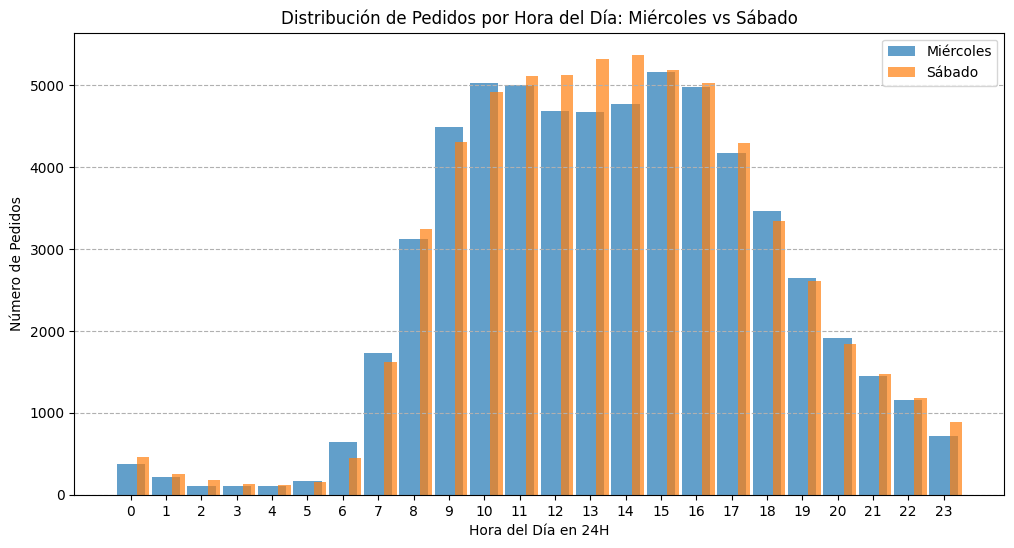

In [ ]:
#Crear el gráfico de barras
#Aqui tuve que investigar y hacer la grafica en cierta forma diferente a lo visto en clase
#Mas que todo en la sintaxis y algunos metodos

import matplotlib.pyplot as plt #Importamos la libreria para graficar.

plt.figure(figsize=(12, 6)) #Definimos el tamaño de la figura (A prueba y error viendo como se mira mejor)
#Trazamos las barras para el miercoles
plt.bar(distribucion_miercoles.index, distribucion_miercoles.values, label='Miércoles', alpha=0.7) #Trazar las barras para miércoles

#Trazamos las barras para el sábado
bar_width = 0.35 #Se cambia para que no se superpongan tanto.
plt.bar(distribucion_sabados.index + bar_width, distribucion_sabados.values, label='Sábado', alpha=0.7, width=bar_width)
#En ambas graficas ajustamos "aplha" la transparencia porque se superponen en cierto punto.

plt.xlabel('Hora del Día en 24H')
plt.ylabel('Número de Pedidos')
plt.title('Distribución de Pedidos por Hora del Día: Miércoles vs Sábado')
plt.xticks(range(24)) # Asegura que todas las horas (0 a 23) se muestren en el eje X
plt.legend()
plt.grid(axis='y', linestyle='--') #Agregamos lineas horizontales en el eje Y y indicamos el tipo
plt.show()

Escribe aquí tus conclusiones

Podemos observar que hay picos de actividad que pueden darse en ciertas horas los miercoles y sabados. Por ejemplo, el pico del miércoles podría estar más centrado en las horas laborales o de la tarde, mientras que el pico del sábado podría estar más distribuido a lo largo del día; este análisis nos permite ver cómo el patrón de comportamiento de compra por hora del día varía entre un día típico de entre semana y un día del fin de semana, lo cual es importante para la planificación operativa específica de cada día.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

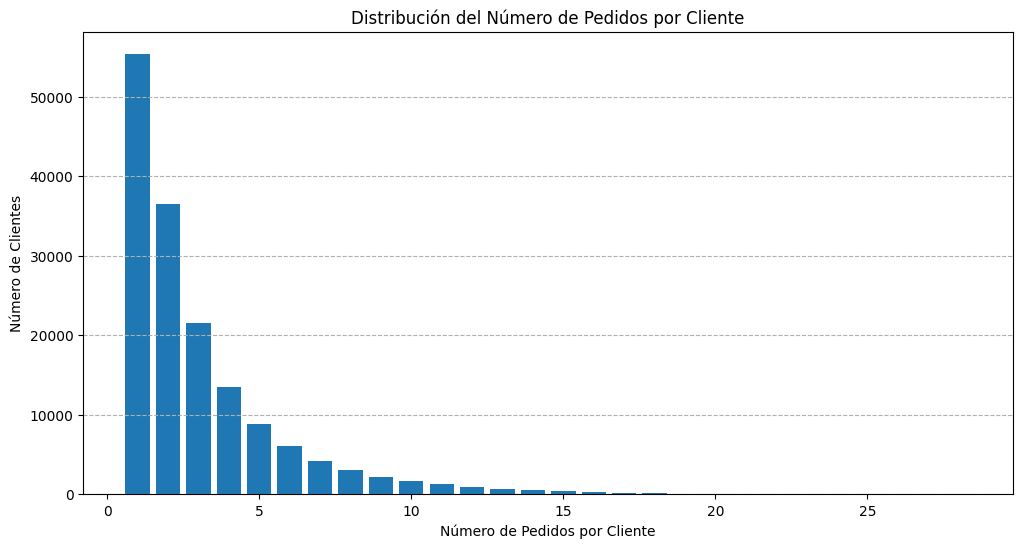

In [ ]:
#Contamos cuántos pedidos hizo cada cliente
#Agrupamos el DataFrame orders_df por 'user_id' y contamos el número de 'order_id' para cada usuario.
conteo_pedidos_por_cliente = orders_df.groupby('user_id')['order_id'].count()

#Contamos la frecuencia de cada número de pedidos
#Tomamos la Serie conteo_pedidos_por_cliente y aplicando value_counts() sobre sus valores.
distribucion_numero_pedidos = conteo_pedidos_por_cliente.value_counts().sort_index()

#Creamos el gráfico de barras
plt.figure(figsize=(12, 6)) # Ajusta el tamaño de la figura
#Graficamos la distribución
plt.bar(distribucion_numero_pedidos.index, distribucion_numero_pedidos.values)
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Número de Clientes')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.grid(axis='y', linestyle='--') #Nuevamente agregamos lineas de referencia en Y
plt.show()

Escribe aquí tus conclusiones

Este análisis revela la lealtad y frecuencia de los clientes. La conclusión principal aquí seria sobre la forma de la distribución que se puede observar. Se nota que un gran número de clientes han realizado un número relativamente pequeño de pedidos (1, 2 o 3); tambien se aprecia que un número menor de clientes ha realizado una cantidad significativamente mayor de pedidos. Esto nos indica que el negocio tiene una base considerable de clientes que prueban el servicio o que simplemente lo usan ocasionalmente; pero hay un grupo más pequeño de clientes recurrentes y frecuentes. Entender el porque de esta distribución es importante para estrategias de retención de clientes y/o para identificar a los usuarios más valiosos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
#Contamos la frecuencia de cada producto segun su ID en el DataFrame order_products
productos_mas_pedidos = order_products_df['product_id'].value_counts()

#Ahora Obtenemos los ID de los 20 productos más frecuentes
top_20_productos_id = productos_mas_pedidos.head(20).index

#Filtramos el DataFrame products para obtener la información de estos 20 productos
informacion_top_20_productos = products_df[products_df['product_id'].isin(top_20_productos_id)]

#Para mas orden y detalle vamos a unir la informacion, primero creamos un DataFrame
top_20_conteo_df = productos_mas_pedidos.head(20).reset_index()
top_20_conteo_df.columns = ['product_id', 'frecuencia_pedidos']
#Ahora fusionamos la información de productos usando pd.merge que es para ese fin
top_20_productos_completos = pd.merge(top_20_conteo_df, products_df[['product_id', 'product_name']], on='product_id')

# Mostrar los 20 principales productos por frecuencia de pedido (ID, Nombre, Frecuencia)
print("Los 20 productos más pedidos son :")
display(top_20_productos_completos)

Los 20 productos más pedidos son :


,product_id,frecuencia_pedidos,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Estadísticas descriptivas del número de artículos por pedido:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


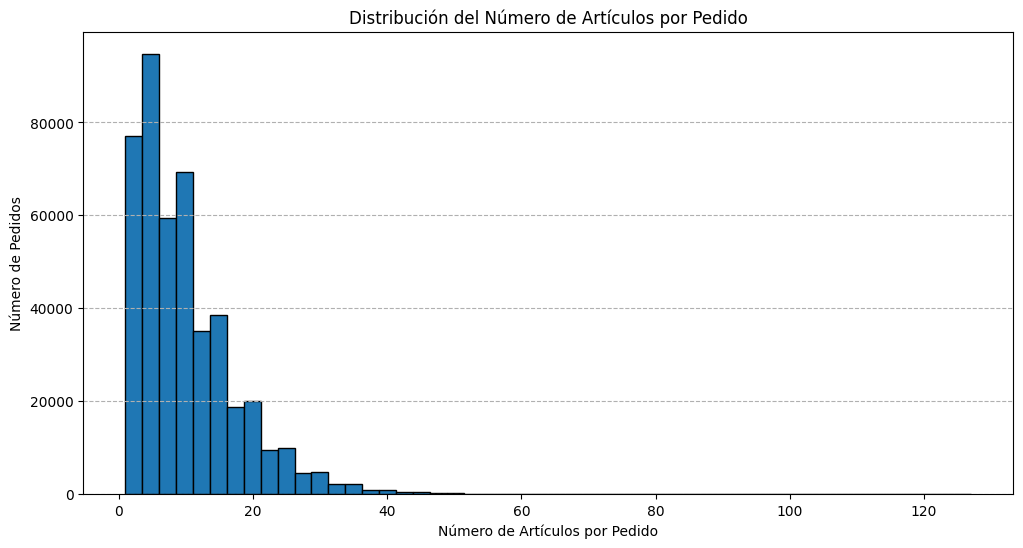

In [ ]:
#Primero vamos a Contar el número de artículos en cada pedido
# Luego Agrupamos order_products_df por 'order_id' y contamos el número de product_id en cada grupo
articulos_por_pedido = order_products_df.groupby('order_id')['product_id'].count()

# Mostrar estadísticas descriptivas de la distribución, asi podemos ver la media y otros datos
print("Estadísticas descriptivas del número de artículos por pedido:")
print(articulos_por_pedido.describe())

# Un histograma es útil para ver la forma general de la distribución a traves del tiempo
plt.figure(figsize=(12, 6))
plt.hist(articulos_por_pedido, bins=50, edgecolor='black') # Usamos los valores directamente de articulos_por_pedido
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Número de Pedidos')
plt.title('Distribución del Número de Artículos por Pedido')
plt.grid(axis='y', linestyle='--')
plt.show()

# Alternativamente, si prefieres un gráfico de barras para los primeros valores (si no hay demasiados)
# Puedes graficar solo las primeras N entradas de distribucion_articulos_por_pedido
# N = 30 # Por ejemplo, graficar los primeros 30 conteos de artículos
# plt.figure(figsize=(12, 6))
# plt.bar(distribucion_articulos_por_pedido.head(N).index, distribucion_articulos_por_pedido.head(N).values)
# plt.xlabel('Número de Artículos por Pedido')
# plt.ylabel('Número de Pedidos')
# plt.title(f'Distribución del Número de Artículos por Pedido (Primeros {N} Conteos)')
# plt.grid(axis='y', linestyle='--')
# plt.show()

Escribe aquí tus conclusiones

La distribución muestra una alta concentración de pedidos pequeños a medianos. Se entiende que, si bien la mayoría de las transacciones son de un tamaño manejable, la plataforma también atiende a clientes que realizan compras mas grandes en un solo pedido. Entender esta distribución es útil para la planificación de inventario, logística o para identificar diferentes segmentos de clientes basados en el tamaño de sus compras.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
#Filtramos el order_products_df para sacar solo los productos que fueron reordenados y luego los contamos
productos_reordered = order_products_df[order_products_df['reordered'] == 1] #Filtramos donde el valor es 1, quiere decir que ha sido reordenado
conteo_reordered = productos_reordered['product_id'].value_counts() #Cuenta la frecuencia de cada uno


In [ ]:
#Ahora obtenemos los IDs de esos 20 productos más reordenados

top_20_reordered_id = conteo_reordered.head(20).index #Como estan en orden... Seleccionamos las primeras 20


In [ ]:
#Ahora para obtener los nombres de los productos tenemos que Combinar con el DataFrame products_df

top_20_reordered_df = conteo_reordered.head(20).reset_index() #Creamos un dataframe y reoerdenamos
top_20_reordered_df.columns = ['product_id', 'frecuencia_reordenado']#Indicamos los nombres de las columnas


In [ ]:
#Ahora fusionamos con la información de productos usando pd.merge

top_20_reordered_completos = pd.merge(
    top_20_reordered_df,
    products_df[['product_id', 'product_name']], #Seleccionamos solo las columnas product_id y product_name de products_df
    on='product_id', #Esta es la clave o indicador de la fusion
    how='inner' #Para asegurar que solo fusionamos los IDs que están en los dos dataframes

 )

In [ ]:
#Ahora mostramos los 20 principales productos reordenados.

print("Los 20 productos más reordenados son: ")
display(top_20_reordered_completos)


Los 20 productos más reordenados son: 


,product_id,frecuencia_reordenado,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Escribe aquí tus conclusiones

Los productos que aparecen en esta lista son aquellos que los clientes tienden a comprar de manera repetida. Otra vez, vemos que son productos básicos, de consumo regular; y ademas la alta frecuencia de reordenamiento para estos productos es un fuerte indicador de que los clientes están satisfechos con ellos y/o que son artículos que necesitan seguido. Como mencionamos en la seccion anterior es muy probable que estos productos sean los que hagan volver a un cliente.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
#Segun entiendo la instruccion y de acuerdo a la investigacion esto se conoce como "Tasa de reorden"

order_products_df['reordered'] = order_products_df['reordered'].astype(int) #Por si acaso
total_pedidos_por_producto = order_products_df.groupby('product_id').size() #Numero todal de pedidos agrupando por product id
total_reordered_por_producto = order_products_df.groupby('product_id')['reordered'].sum() #Sacamos el total de reordenados.



In [ ]:
#Ahora vamos a obtener la tasa de reorden.

tasa_reorden_por_producto = total_reordered_por_producto.reindex(total_pedidos_por_producto.index, fill_value=0) / total_pedidos_por_producto #Aqui consideramos quizas que un producto pueda aparecer en pedidos pero no en reorden, lo que nos puede poner un cero en la division
tasa_reorden_df = tasa_reorden_por_producto.reset_index() #Creamos un dataframe y unimos.
tasa_reorden_df.columns = ['product_id', 'tasa_reorden']
tasa_reorden_con_nombre = pd.merge(
    tasa_reorden_df,
    products_df[['product_id', 'product_name']],
    on='product_id',
    how='inner'
)


In [ ]:
#Mostramos los resultados.

print("Productos con las tasas de reorden más altas:")
display(tasa_reorden_con_nombre.sort_values(by='tasa_reorden', ascending=False).head(20))


Productos con las tasas de reorden más altas:


,product_id,tasa_reorden,product_name
28108,30644,1.0,Organic French Roast
7340,8054,1.0,Bissli Smokey Wheat Snacks
28114,30650,1.0,Mushroom Lover's Veggie Burgers
41002,44747,1.0,Frozen Organic Blackberries
40998,44743,1.0,Real Zero Cola
32921,35897,1.0,Ham Hock
32861,35834,1.0,Bulgarian Organic Yogurt
2684,2939,1.0,Cheddar Crunchin' Crackers
20357,22209,1.0,Temples Earl Gray Strong Tea
20361,22213,1.0,2% Reduced Fat Chocolate Milk


Escribe aquí tus conclusiones

Si lo realizado es lo correcto; el cálculo de la tasa de reorden por producto nos ha permitido cuantificar "la propensión" a la compra repetida de cada artículo en el negocio. Esta información es Importante para comprender qué productos son los que impulsan la lealtad del cliente.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
#Vamos a repetir similarmente pero ahora enfocados en el cliente.

#Primero tendriamos que fusionar order products con orders para calcular la tasa de reorden por cliente
order_products_with_user = pd.merge(
    order_products_df,
    orders_df[['order_id', 'user_id']], # Seleccionamos solo las columnas necesarias de orders_df
    on='order_id',
    how='inner'
)

reorder_por_cliente = order_products_with_user.groupby('user_id')['reordered'].sum() #Agrupamos por user id
total_productos_por_cliente = order_products_with_user.groupby('user_id').size() #Calculamos el total de reordered y el total de productos pedidos
tasa_reorder_cliente = reorder_por_cliente / total_productos_por_cliente #Calculamos la tasa de reorden



In [ ]:
#Mostramos los resultados

print("Estadísticas descriptivas de la tasa de reorden por cliente:")
print(tasa_reorder_cliente.describe())

# Mostrar las tasas de reorden para algunos clientes (primeros 10, por ejemplo)
print("\nTasas de reorden por cliente (primeros 10 usuarios):")
print(tasa_reorder_cliente.head(10))

Estadísticas descriptivas de la tasa de reorden por cliente:
count    149626.000000
mean          0.494853
std           0.292685
min           0.000000
25%           0.272727
50%           0.500000
75%           0.724138
max           1.000000
dtype: float64

Tasas de reorden por cliente (primeros 10 usuarios):
user_id
2     0.038462
4     0.000000
5     0.666667
6     0.000000
7     0.928571
11    0.200000
12    0.250000
13    0.565217
14    0.360656
15    0.538462
dtype: float64


Escribe aquí tus conclusiones

Segun describe se puede observar que hay gran variabilidad en la tasa para los clientes; ademas esta tasa se vuelve mas significativa para los clientes que han hecho varios pedidos. Esta es una metrica util para la segmentacion de clientes.
Esta información es muy util para entender el comportamiento de lealtad y puede ser utilizada para estrategias de marketing dirigidas, personalización de la experiencia del usuario o evaluación del ciclo de vida del cliente

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
#Aqui vamos a usar add to cart order y product id para empezar

primeros_en_carrito = order_products_df[order_products_df['add_to_cart_order'] == 1] #Filtramos el dataframe para sacar los que tienen valor de 1
conteo_primeros_en_carrito = primeros_en_carrito['product_id'].value_counts() #Contamos la frecuencia de cada uno
top_20_primeros_en_carrito_id = conteo_primeros_en_carrito.head(20).index #Seleccionamos los 20 primeros


In [ ]:
#Ahora vamos a combinar con products df para tener los detalles del producto

top_20_primeros_en_carrito_df = conteo_primeros_en_carrito.head(20).reset_index() #Creamos el dataframe con su columnas
top_20_primeros_en_carrito_df.columns = ['product_id', 'frecuencia_primero_en_carrito']
top_20_primeros_completos = pd.merge(
    top_20_primeros_en_carrito_df,
    products_df[['product_id', 'product_name']],
    on='product_id',
    how='inner'
)


In [ ]:
#Mostramos los resultados

print("Los 20 principales artículos que la gente pone primero en sus carritos:")
display(top_20_primeros_completos)


Los 20 principales artículos que la gente pone primero en sus carritos:


,product_id,frecuencia_primero_en_carrito,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


Escribe aquí tus conclusiones

Aqui identificamos los 20 productos que las personas ponen primero en el carrito, pueden ser articulos de primera necesidad y reflejan tambien el objetivo principal de la compra del cliente. Esto nos es util para facilitar en la interfaz el acceso a estos productos o utilizarlos como estrategia de mercadeo.

### Conclusion general del proyecto:

Este proyecto de análisis de datos de Instacart ha sido un ejercicio completo que nos ha guiado desde la carga inicial de datos hasta la identificación de patrones de comportamiento del cliente y de los productos. A pesar de que no ha estado del todo facil, maxime por el tiempo disponible para el mismo hemos logrado muchas cosas.

Dominio del Preprocesamiento de Datos: Aprendimos a identificar y manejar problemas comunes en conjuntos de datos reales. Tomamos decisiones informadas sobre cómo imputar o eliminar datos basándonos en el contexto.
 Exploramos los patrones temporales de los pedidos, identificando los momentos de mayor actividad y las diferencias entre días. También analizamos la frecuencia con la que los clientes realizan pedidos, revelando la proporción de compradores ocasionales frente a compradores frecuentes.
Determinamos el tamaño típico de un pedido y visualizamos su distribución, mostrando que la mayoría de los pedidos son pequeños a medianos pero existen algunos muy grandes.
Identificamos los productos más populares en general y, de manera crucial, aquellos que son más propensos a ser reordenados. Esto nos dio una perspectiva sobre los productos básicos y esenciales que impulsan la compra recurrente.
Calculamos la tasa de reorden a nivel de producto, una métrica clave para entender la "fidelidad" inherente a cada artículo.
Calculamos la tasa de reorden a nivel de cliente, lo que nos permitió cuantificar que tan recurrente es el comportamiento de compra para cada usuario y entonces poder segmentar a los clientes según esta métrica.
Identificamos los productos que actúan como el punto de partida para los pedidos, revelando los artículos que los clientes priorizan.

Resultados Clave y Aprendizajes:

Patrones de demanda predecibles: Se identificaron picos de demanda claros por hora y día, lo que permite optimizar operaciones y recursos.
Diversidad en el comportamiento del cliente: Existe una mezcla de clientes ocasionales y leales, lo que justifica estrategias de marketing diferenciadas.
Identificación de productos estrella: Los productos con alta tasa de reorden son impulsores clave de la recurrencia. Estos deberían ser prioritarios en inventario y visibilidad.
Comprensión del inicio del viaje del cliente: Los primeros artículos en el carrito ofrecen información sobre la intención inicial de compra del cliente.
Aplicación de habilidades en Python/pandas: Se practicaron y aplicaron operaciones esenciales de pandas como filtrado, agrupación (groupby), conteo (value_counts, .size(), .count()), agregación (.sum()), manejo de ausentes (.fillna()), manejo de duplicados (.duplicated(), .drop_duplicates()), fusión de DataFrames (pd.merge) y visualización con matplotlib (plt.bar, plt.hist).
Pensamiento analítico: El ejercicio requirió interpretar los resultados de cada paso, justificar decisiones de preprocesamiento y conectar diferentes hallazgos para obtener una visión más completa del negocio.
En conclusión, este proyecto no solo proporcionó información valiosa sobre el comportamiento de los usuarios de Instacart y sus patrones de compra, sino que también sirvió como un ejercicio práctico fundamental en el ciclo de vida del análisis de datos: desde la limpieza y preparación hasta la exploración y la extracción de insights significativos.